<a href="https://colab.research.google.com/github/GeneGenius/DataScienceJourney/blob/main/Linear_Regression_with_Tensor_Flow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Linear Regression with Tensor Flow Keras

In [ ]:
#Importig libraries
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
#Define the functions that build and ttrain. a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  #Most simple tf.keras models are sequenttial.
  #A sequetial model conttais one or more layers
  model = tf.keras.models.Sequential()

  #Describe the topography of the model
  #The topograpy of a simple liear regression model is a single node in a single layer
  model.add(tf.keras.layers.Dense(units=1, 
                                   input_shape=(1,)))
  
  #Compile the model topography into code that
  #TensorFLow can efficiently execute.  Configure training to minimize the model's mean squared error

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  
  return model

def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data"""

  #Feed the feature values and label values to the model. The model will train for the specified number
  #of epochs, gradually learning how the feature values relate to the label values.
  history =model.fit(x=feature,
                     y=label,
                     batch_size=batch_size,
                     epochs=epochs)
  
  #Gather the trained model's weight and bias
  trained_weight =model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  #The list of epochs is stored separately from the rest of history
  epochs =history.epoch

  #Gather history of each epoch
  hist =pd.DataFrame(history.history)

  #Specifically gather the model's root mean
  #squared error at each epoch
  rmse =hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")






Defined build_model and train_model


In [ ]:
#Define the plotting functions
def plot_the_model(trained_weight, trained_bias,feature,label):
  """Plot the trained model against the training feature and label."""

  #Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  #Plot the feature values vs. label values
  plt.scatter(feature, label)

  #Create a red line represeting the model. The red line starts 
  #at cordinattes (x0, y0) and ends at cordinates (x1,y1)

  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c="r")

  #Render the scatter plot and the red line
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions")



Defined the plot_the_model and plot_the_loss_curve functions


In [ ]:
#Dataset
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 1s 865ms/step - loss: 211.3573 - root_mean_squared_error: 14.5381
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 203.8505 - root_mean_squared_error: 14.2776
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 198.5358 - root_mean_squared_error: 14.0903
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 194.1630 - root_mean_squared_error: 13.9342
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 190.3375 - root_mean_squared_error: 13.7963
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 186.8768 - root_mean_squared_error: 13.6703
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 183.6796 - root_mean_squared_error: 13.5528
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 180.6827 - root_mean_squared_error: 13.4418
Epoch 9/10
1/1 [==============================] - 0s 18ms/step - loss: 177.8441

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


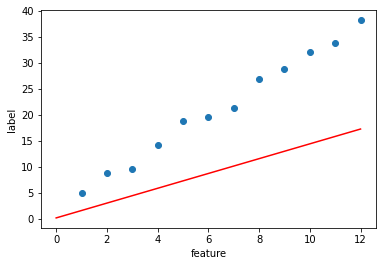

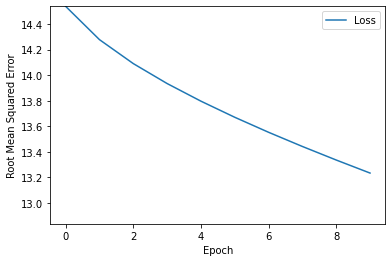

In [ ]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 317ms/step - loss: 220.8056 - root_mean_squared_error: 14.8595
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 150.1892 - root_mean_squared_error: 12.2552
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 111.2853 - root_mean_squared_error: 10.5492
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 85.0358 - root_mean_squared_error: 9.2215
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 65.8913 - root_mean_squared_error: 8.1173
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 51.3713 - root_mean_squared_error: 7.1674
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 40.1190 - root_mean_squared_error: 6.3340
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 31.2959 - root_mean_squared_error: 5.5943
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 24.3392 - root_mean_squared

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


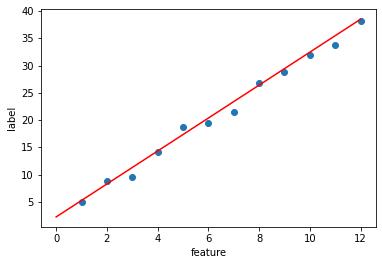

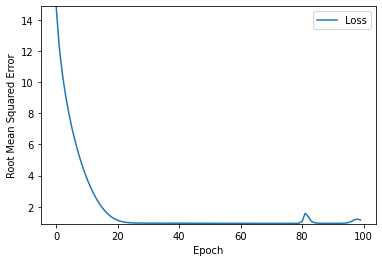

In [ ]:
#Increasing the number of epochs, can influence the converggence of the gradient descent annd can also cause overfitting of the training data

learning_rate=0.1
epochs=100   
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#NB!  This model coverges when additional trainning doesnt improve it, so from the graph above, the number of epoch from 40 to 100 doesnt see ay significant change.

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 307ms/step - loss: 467.2649 - root_mean_squared_error: 21.6163
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 190.3225 - root_mean_squared_error: 13.7957
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 89.1786 - root_mean_squared_error: 9.4434
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 42.8809 - root_mean_squared_error: 6.5484
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 20.5555 - root_mean_squared_error: 4.5338
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 9.8050 - root_mean_squared_error: 3.1313
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 4.7640 - root_mean_squared_error: 2.1827
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 2.4958 - root_mean_squared_error: 1.5798
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5261 - root_mean_squared_error: 1.235

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


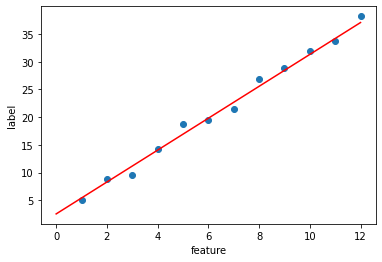

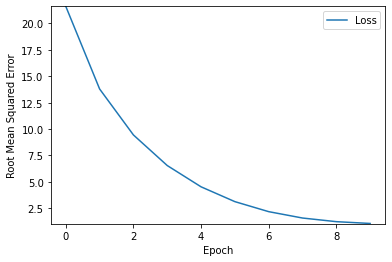

In [ ]:
#Increase the learning rate

learning_rate=0.30
epochs=10

my_model = build_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#Increasing the learning rate to an optimal value makes influences the coverges of the model under less epoch

Epoch 1/125


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 406.6465 - root_mean_squared_error: 20.1655
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 245.6308 - root_mean_squared_error: 15.6726
Epoch 3/125
12/12 [==============================] - 0s 2ms/step - loss: 144.5089 - root_mean_squared_error: 12.0212
Epoch 4/125
12/12 [==============================] - 0s 2ms/step - loss: 81.9564 - root_mean_squared_error: 9.0530
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 41.7195 - root_mean_squared_error: 6.4591
Epoch 6/125
12/12 [==============================] - 0s 2ms/step - loss: 15.2411 - root_mean_squared_error: 3.9040
Epoch 7/125
12/12 [==============================] - 0s 1ms/step - loss: 3.7627 - root_mean_squared_error: 1.9398
Epoch 8/125
12/12 [==============================] - 0s 2ms/step - loss: 1.4196 - root_mean_squared_error: 1.1915
Epoch 9/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2832 - root_m

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


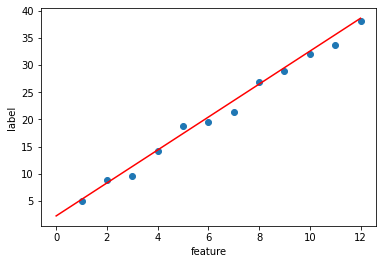

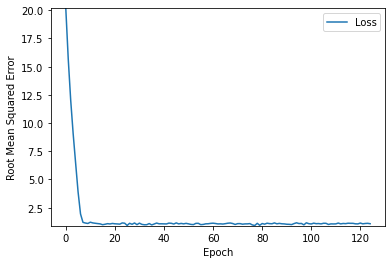

In [ ]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#There is a high chance of overfitting occuring when the model learns so well from the train dataset but however can fail when applied to unseen data